In [1]:
import zipfile

# Download zip file of pizza_steak images
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [3]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (384, 512, 3)


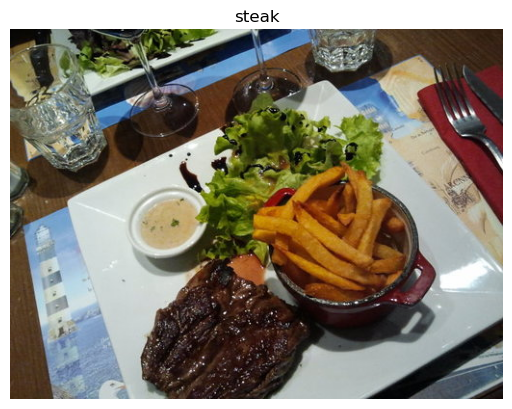

In [6]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [7]:
import tensorflow as tf
tf.constant(img)

2023-11-02 15:51:27.460386: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-02 15:51:27.460402: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-02 15:51:27.460408: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-02 15:51:27.460590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-02 15:51:27.460839: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 5,  3,  4],
        [ 6,  4,  5],
        [ 6,  5,  3],
        ...,
        [52, 33, 18],
        [49, 30, 15],
        [46, 27, 12]],

       [[ 6,  4,  5],
        [ 6,  4,  5],
        [ 6,  5,  3],
        ...,
        [51, 32, 17],
        [50, 31, 16],
        [49, 30, 15]],

       [[ 6,  4,  5],
        [ 6,  4,  5],
        [ 7,  6,  4],
        ...,
        [51, 32, 17],
        [52, 33, 18],
        [52, 33, 18]],

       ...,

       [[68, 44, 20],
        [68, 44, 20],
        [68, 44, 20],
        ...,
        [24, 16, 14],
        [21, 13, 11],
        [18, 10,  8]],

       [[69, 45, 21],
        [68, 44, 20],
        [67, 43, 19],
        ...,
        [22, 12, 11],
        [20, 10,  9],
        [18,  8,  7]],

       [[72, 48, 24],
        [69, 45, 21],
        [67, 43, 19],
        ...,
        [20, 10,  9],
        [20, 10,  9],
        [18,  8,  7]]], dtype=uint8)>

In [8]:
img.shape # width, height, colour channels

(384, 512, 3)

In [9]:
# get all the balue in 0 & 1
img / 255.

array([[[0.01960784, 0.01176471, 0.01568627],
        [0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01960784, 0.01176471],
        ...,
        [0.20392157, 0.12941176, 0.07058824],
        [0.19215686, 0.11764706, 0.05882353],
        [0.18039216, 0.10588235, 0.04705882]],

       [[0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01960784, 0.01176471],
        ...,
        [0.2       , 0.1254902 , 0.06666667],
        [0.19607843, 0.12156863, 0.0627451 ],
        [0.19215686, 0.11764706, 0.05882353]],

       [[0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01568627, 0.01960784],
        [0.02745098, 0.02352941, 0.01568627],
        ...,
        [0.2       , 0.1254902 , 0.06666667],
        [0.20392157, 0.12941176, 0.07058824],
        [0.20392157, 0.12941176, 0.07058824]],

       ...,

       [[0.26666667, 0.17254902, 0.07843137],
        [0.26666667, 0.17254902, 0.07843137],
        [0.26666667, 0

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set a path from our current directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)



# build cnn model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])


# label and data created for us using flow_from_directory
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # total img / batch_size = total steps for machine to know and memory calculation for storing
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-11-02 15:51:28.510531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 11s 180ms/step - loss: 0.5985 - accuracy: 0.6493 - val_loss: 0.4357 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4316 - accuracy: 0.8047 - val_loss: 0.3718 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 5s 104ms/step - loss: 0.3973 - accuracy: 0.8273 - val_loss: 0.3533 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3951 - accuracy: 0.8313 - val_loss: 0.4226 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3650 - accuracy: 0.8353 - val_loss: 0.3418 - val_accuracy: 0.8540


## Update in tensorflow

below you can see we have used ImageDataGenerator which has been updated to image_dataset_from_directory of tf.keras.utils.

The main differences between them are:

*   rescaling & data loading:
    

  1.   In `ImageDataGenerator` we rescaled imag then applied flow_from_directory, we used **target_size** and **class_mode**
  2.   In `image_dataset_from_directory` we got the data from directory using **image_size** and **label_mode** which are used same as *target_size* and *class_mode*. here, to rescale image we have added new layer in Sequential Model:

```
tf.keras.layers.Rescaling(1./255,input_shape=(224,224,3)),
```






In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

tf.random.set_seed(42)


# set a path from our current directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = image_dataset_from_directory(directory=train_dir,
                                               batch_size=32,
                                               image_size = (224,224),
                                               label_mode="binary",
                                               seed=42)

valid_data = image_dataset_from_directory(directory=test_dir,
                                               batch_size=32,
                                               image_size = (224,224),
                                               label_mode="binary",
                                               seed=42)

# build cnn model
model_1_new = tf.keras.models.Sequential([

    tf.keras.layers.Rescaling(1./255,input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1_new.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])


# label and data created for us using flow_from_directory
history_1_new = model_1_new.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # total img / batch_size = total steps for machine to know and memory calculation for storing
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 185ms/step - loss: 0.6524 - accuracy: 0.6460 - val_loss: 0.4963 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4568 - accuracy: 0.7920 - val_loss: 0.5118 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4159 - accuracy: 0.8133 - val_loss: 0.3551 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 0.3645 - accuracy: 0.8420 - val_loss: 0.3247 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.3225 - accuracy: 0.8633 - val_loss: 0.3476 - val_accuracy: 0.8440


In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # total img / batch_size = total steps for machine to know and memory calculation for storing
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 83ms/step - loss: 981.7983 - accuracy: 0.5360 - val_loss: 284.7282 - val_accuracy: 0.5460
Epoch 2/5
47/47 [==============================] - 1s 21ms/step - loss: 323.7272 - accuracy: 0.5247 - val_loss: 299.7245 - val_accuracy: 0.5920
Epoch 3/5
47/47 [==============================] - 1s 22ms/step - loss: 278.4440 - accuracy: 0.5147 - val_loss: 247.9711 - val_accuracy: 0.5560
Epoch 4/5
47/47 [==============================] - 1s 21ms/step - loss: 249.8413 - accuracy: 0.5240 - val_loss: 220.1578 - val_accuracy: 0.5380
Epoch 5/5
47/47 [==============================] - 1s 22ms/step - loss: 225.2662 - accuracy: 0.5000 - val_loss: 195.0855 - val_accuracy: 0.5460


In [24]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Rescaling
from tensorflow.keras import Sequential

In [25]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Rescaling(1./255,input_shape=(224,224,3)),  
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu'), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2023-11-02 20:02:21.613136: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


47/47 [==============================] - 11s 188ms/step - loss: 1.9376 - accuracy: 0.6560 - val_loss: 0.5509 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.5368 - accuracy: 0.7460 - val_loss: 0.4918 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4178 - accuracy: 0.8273 - val_loss: 0.3963 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.2592 - accuracy: 0.9087 - val_loss: 0.4123 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.1466 - accuracy: 0.9600 - val_loss: 0.4861 - val_accuracy: 0.7960


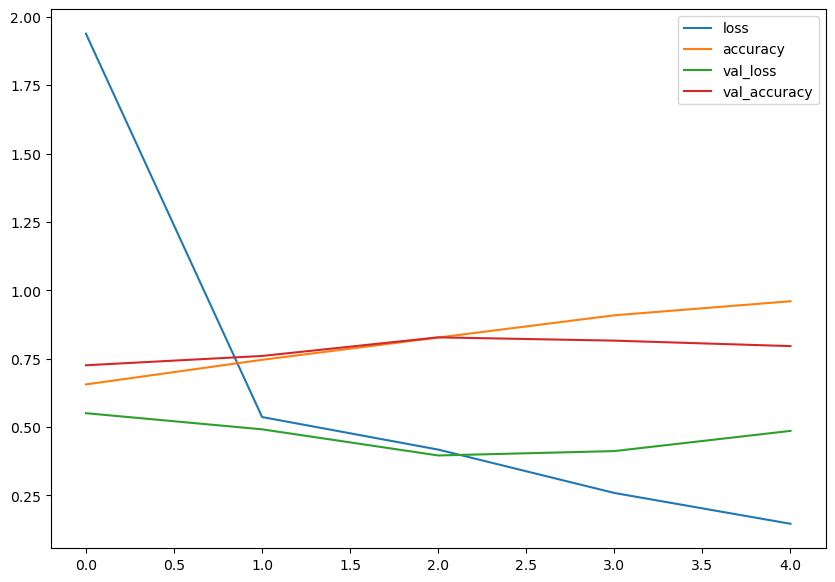

In [26]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [27]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

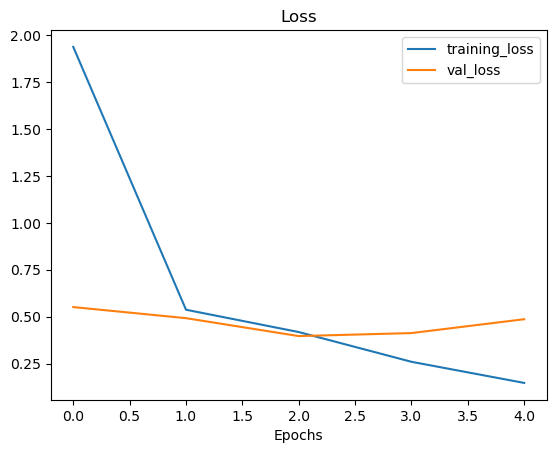

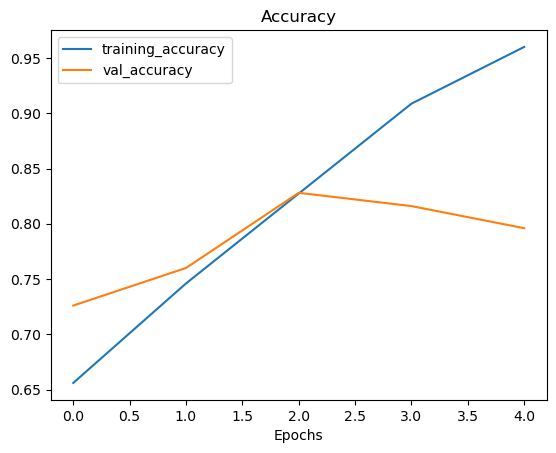

In [28]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [29]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_18 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_6 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 47734

In [30]:
train_data = image_dataset_from_directory(directory=train_dir,
                                               batch_size=32,
                                               image_size = (224,224),
                                               label_mode="binary",
                                               seed=42)

test_data = image_dataset_from_directory(directory=test_dir,
                                               batch_size=32,
                                               image_size = (224,224),
                                               label_mode="binary",
                                               seed=42)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [31]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Rescaling(1./255,input_shape=(224,224,3)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-11-02 20:05:37.347640: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


47/47 [==============================] - 11s 164ms/step - loss: 0.6571 - accuracy: 0.6047 - val_loss: 0.5790 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 4s 77ms/step - loss: 0.4825 - accuracy: 0.7853 - val_loss: 0.4984 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 4s 78ms/step - loss: 0.4369 - accuracy: 0.8180 - val_loss: 0.3708 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 4s 73ms/step - loss: 0.4028 - accuracy: 0.8287 - val_loss: 0.3589 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 4s 78ms/step - loss: 0.3998 - accuracy: 0.8207 - val_loss: 0.3505 - val_accuracy: 0.8420


In [32]:
# Check out the model architecture
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 10)       

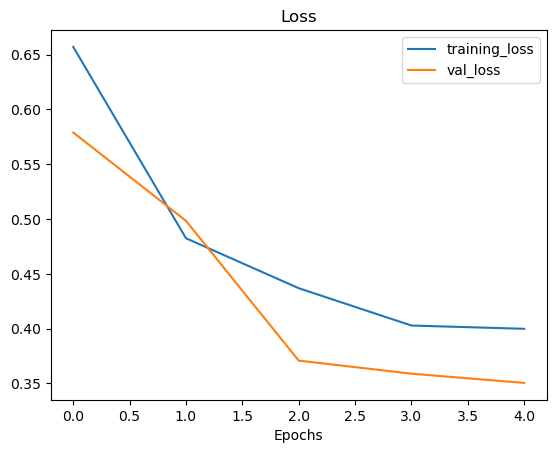

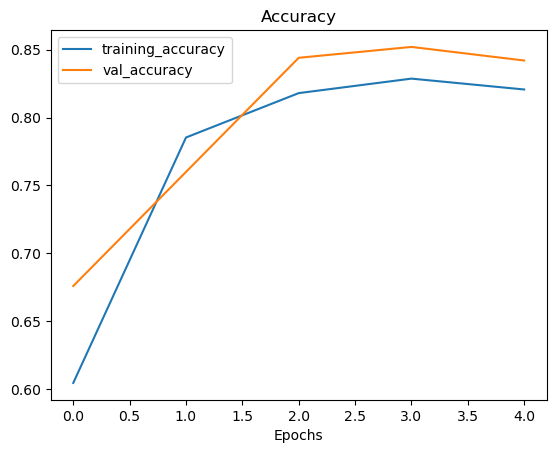

In [33]:
plot_loss_curves(history_5)